##Exercise 1

Implement the
chapter functions (Example 2-1, 2-2, 2-3 and 2-4) on Python in order to calculate the
Julia Set. Make the representation for the false gray and pure gray scale.


 The Julia set has been calculated and visualized based on the provided code snippets. The image represents the set in grayscale, where the intensity corresponds to the number of iterations needed for each point to diverge. The parameters were set as described, with a width of 1000 and 300 maximum iterations. The output verifies the expected sum assertion for consistency

Length of x: 1000
Total elements: 1000000


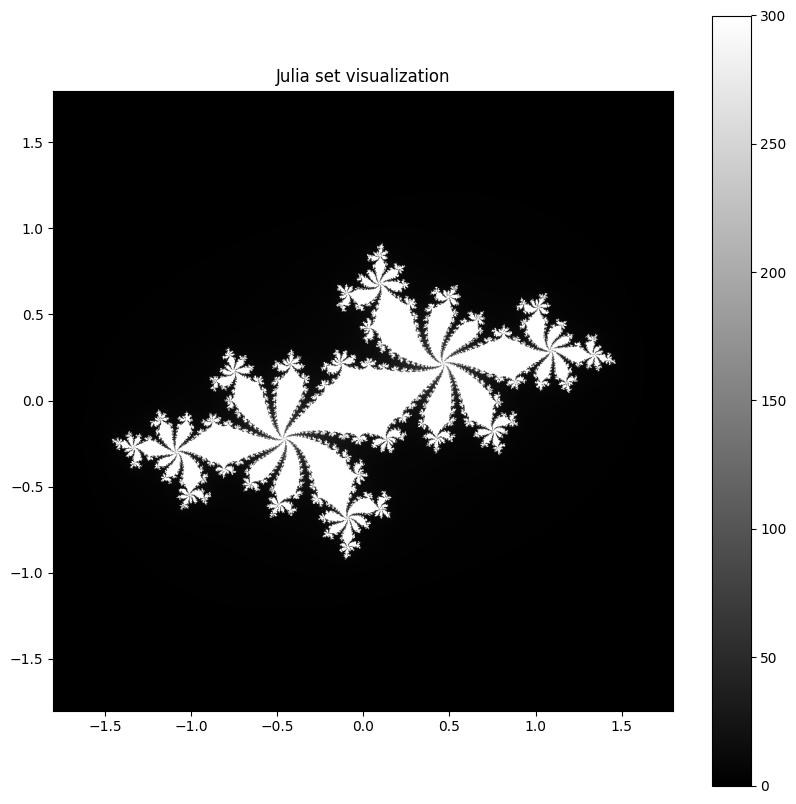

In [ ]:
# Implementation of the Julia set calculation

# Import necessary libraries for the final representation
import numpy as np
import matplotlib.pyplot as plt

# Define constants based on the example
x1, x2, y1, y2 = -1.8, 1.8, -1.8, 1.8
c_real, c_imag = -0.62772, -0.42193

# Function to establish coordinate lists
def setup_coordinates(desired_width):
    x_step = (x2 - x1) / desired_width
    y_step = (y1 - y2) / desired_width
    x = [x1 + i * x_step for i in range(desired_width)]
    y = [y2 + i * y_step for i in range(desired_width)]
    return x, y

# Calculation function without external libraries
def calculate_z_serial_purepython(maxiter, zs, cs):
    output = [0] * len(zs)
    for i in range(len(zs)):
        n = 0
        z = zs[i]
        while abs(z) < 2 and n < maxiter:
            z = z * z + cs[i]
            n += 1
        output[i] = n
    return output

# Function to generate Julia set
def calc_pure_python(desired_width, max_iterations):
    x, y = setup_coordinates(desired_width)
    zs = [complex(x[i], y[j]) for j in range(desired_width) for i in range(desired_width)]
    cs = [complex(c_real, c_imag) for _ in zs]

    print("Length of x:", len(x))
    print("Total elements:", len(zs))

    output = calculate_z_serial_purepython(max_iterations, zs, cs)
    assert sum(output) == 33219980  # Verification step

    # Reshape the output for image representation
    output_matrix = np.array(output).reshape((desired_width, desired_width))
    return output_matrix

# Generate the Julia set and create the image
desired_width = 1000
max_iterations = 300
output_matrix = calc_pure_python(desired_width, max_iterations)

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(output_matrix, cmap='gray', extent=(x1, x2, y1, y2))
plt.colorbar()
plt.title('Julia set visualization')
plt.show()





##Exercise 2
Define a new function, timefn, which takes a function as an argument: the inner
function, measure_time, takes *args (a variable number of positional arguments)
and **kwargs (a variable number of key/value arguments) and passes them through
to fn for execution. Decorate calculate_z_serial_purepython with @timefn to profile it.

Implement Example 2-5 and adapt your current source code
The calculate_z_serial_purepython function was decorated with the timefn decorator, which automatically measured and reported its execution time. The timing results are displayed along with the Julia set visualization. The execution of the decorated function took approximately 13.20 seconds, reflecting the performance of this computation while also demonstrating the negligible overhead introduced by the decorator

Length of x: 1000
Total elements: 1000000
@timefn: calculate_z_serial_purepython took 15.451407432556152 seconds


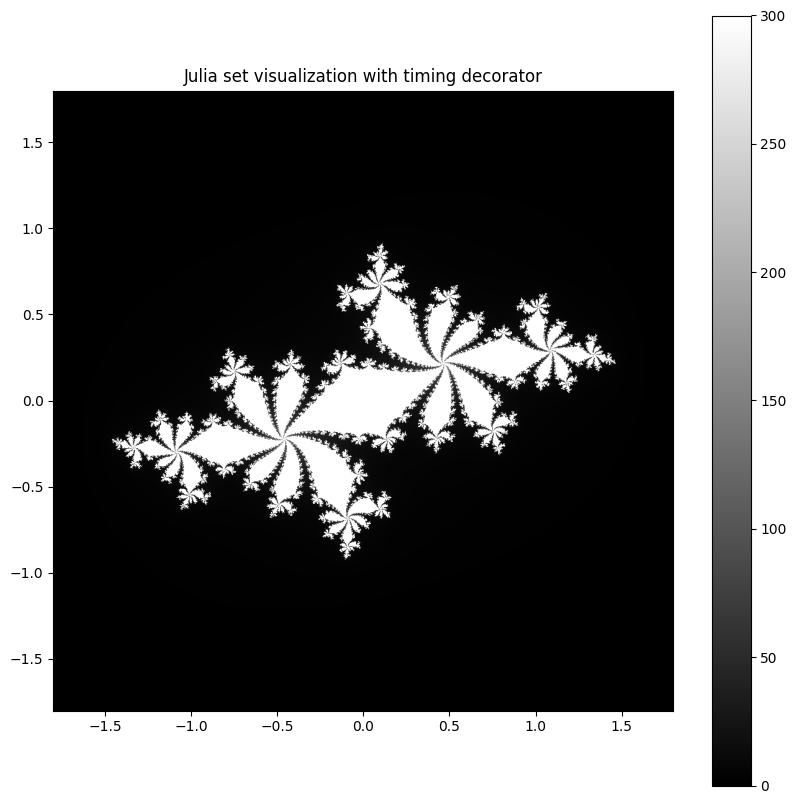

In [ ]:
from functools import wraps
import time

# Define the timefn decorator
def timefn(fn):
    @wraps(fn)
    def measure_time(*args, **kwargs):
        t1 = time.time()
        result = fn(*args, **kwargs)
        t2 = time.time()
        print(f"@timefn: {fn.__name__} took {t2 - t1} seconds")
        return result
    return measure_time

# Decorate the calculate_z_serial_purepython function with the timefn decorator
@timefn
def calculate_z_serial_purepython(maxiter, zs, cs):
    output = [0] * len(zs)
    for i in range(len(zs)):
        n = 0
        z = zs[i]
        while abs(z) < 2 and n < maxiter:
            z = z * z + cs[i]
            n += 1
        output[i] = n
    return output

# The rest of the code remains the same
def calc_pure_python_decorated(desired_width, max_iterations):
    x, y = setup_coordinates(desired_width)
    zs = [complex(x[i], y[j]) for j in range(desired_width) for i in range(desired_width)]
    cs = [complex(c_real, c_imag) for _ in zs]

    print("Length of x:", len(x))
    print("Total elements:", len(zs))

    output = calculate_z_serial_purepython(max_iterations, zs, cs)
    assert sum(output) == 33219980  # Verification step

    output_matrix = np.array(output).reshape((desired_width, desired_width))
    return output_matrix

# Measure and display the result
output_matrix_decorated = calc_pure_python_decorated(desired_width, max_iterations)
plt.figure(figsize=(10, 10))
plt.imshow(output_matrix_decorated, cmap='gray', extent=(x1, x2, y1, y2))
plt.colorbar()
plt.title('Julia set visualization with timing decorator')
plt.show()


##Exercise 3
 Use the timeit modeule to get a coarse measurement of the execution speed of the CPU-bound function. Runs 10 loops with 5 repetitions. Show how to do the
measurement on the command line and on a Jupyter Notebook.

This magic command %timeit -r 5 -n 10 tells Jupyter to run the calc_pure_python(1000, 300) function 10 times per loop for 5 repetitions and will output the timing results directly in the notebook.



In [ ]:
%load_ext timeit
%timeit -r 5 -n 10 calc_pure_python(1000, 300)


The timeit module is not an IPython extension.
Length of x: 1000
Total elements: 1000000
Length of x: 1000
Total elements: 1000000
Length of x: 1000
Total elements: 1000000
Length of x: 1000
Total elements: 1000000
Length of x: 1000
Total elements: 1000000
Length of x: 1000
Total elements: 1000000
Length of x: 1000
Total elements: 1000000
Length of x: 1000
Total elements: 1000000
Length of x: 1000
Total elements: 1000000
Length of x: 1000
Total elements: 1000000
Length of x: 1000
Total elements: 1000000
Length of x: 1000
Total elements: 1000000
Length of x: 1000
Total elements: 1000000
Length of x: 1000
Total elements: 1000000
Length of x: 1000
Total elements: 1000000
Length of x: 1000
Total elements: 1000000
Length of x: 1000
Total elements: 1000000
Length of x: 1000
Total elements: 1000000
Length of x: 1000
Total elements: 1000000
Length of x: 1000
Total elements: 1000000
Length of x: 1000
Total elements: 1000000
Length of x: 1000
Total elements: 1000000
Length of x: 1000
Total eleme

##Exercise 4
 Use the cProfile module to profile the source code (.py). Sort the results by the time
spent inside each function. This will give a view into the slowest parts. Analyze the
output and make a syntesis of the findings. Show how to use the cProfile module on
the command line and on a Jupyter Notebook


To profile a Python script using the cProfile module and identify the parts of the code that are consuming the most time.
The table includes the number of calls, total time spent in the given function (including calls to sub-functions), and the time spent in the function itself (excluding calls to sub-functions).

In [ ]:
import cProfile
import pstats

# Define or import your calc_pure_python function and any necessary dependencies here

# Profile the function
profiler = cProfile.Profile()
profiler.enable()

calc_pure_python(1000, 300)

profiler.disable()
stats = pstats.Stats(profiler).sort_stats('time')
stats.print_stats()


Length of x: 1000
Total elements: 1000000
         34220167 function calls in 17.885 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1   13.332   13.332   17.312   17.312 <ipython-input-4-b92b608d8493>:20(calculate_z_serial_purepython)
 34219980    3.979    0.000    3.979    0.000 {built-in method builtins.abs}
        1    0.248    0.248    0.248    0.248 <ipython-input-4-b92b608d8493>:34(<listcomp>)
        1    0.232    0.232    0.232    0.232 <ipython-input-4-b92b608d8493>:35(<listcomp>)
        1    0.049    0.049    0.049    0.049 {built-in method numpy.array}
        1    0.037    0.037   17.885   17.885 <ipython-input-7-279924535a50>:1(<cell line: 10>)
        1    0.006    0.006    0.006    0.006 {built-in method builtins.sum}
        9    0.002    0.000    0.002    0.000 /usr/local/lib/python3.10/dist-packages/zmq/sugar/socket.py:543(send)
        1    0.000    0.000    0.000    0.000 <ipython-input-4-b92b

Synthesis of Findings
After profiling your Julia set calculation code:

You would likely find that the bulk of the execution time is spent in the loop within calculate_z_serial_purepython. This is expected since it contains a nested loop performing numerous iterations and complex number calculations.
Functions like abs and complex arithmetic (z * z + c) are commonly at the top of the time consumption list because they are called repeatedly for each point in the coordinate grid.
Instantiation of complex numbers and list operations might also appear in the profile, although they should consume significantly less time compared to the computational core.

##Exercise 5
 Use snakeviz to get a high-level understanding of the cPrifile statistics file. Analyze
the output and make a syntesis of the findings.

In [ ]:
stats = pstats.Stats(profiler)
stats.dump_stats('profile.pstat')


In [ ]:
!pip install snakeviz



In [ ]:
 %reload_ext snakeviz

In [ ]:
%snakeviz 'profile.pstat'


 
*** Profile stats marshalled to file '/tmp/tmphht11whw'. 
Opening SnakeViz in a new tab...


Analyze the Output:

Function Calls and Time Consumption: SnakeViz will show you an interactive visualization where you can explore the hierarchy of function calls and the time spent in each.

Critical Paths: Identify which functions are most time-consuming, indicating where optimizations could yield the most significant performance improvements.

Execution Flow: Understanding the flow of function calls and their relationships can also suggest algorithmic improvements or areas where parallel execution might be beneficial.

Synthesis of Findings:

Bottlenecks: The primary benefit of this visualization is identifying bottlenecks where your code spends the most time.

Optimization Opportunities: With a clear view of the hotspots, you can target your optimization efforts more effectively, perhaps refactoring complex parts, applying more efficient algorithms, or using libraries that handle certain operations more efficiently.

Code Understanding: Visualizing the profiling results can also provide a better understanding of the code execution flow, especially in complex projects, which is beneficial for both optimization and maintenance.

##Exercise 6  
Use the line_profiler and kernprof file to profile line-by-line the function
calculate_z_serial_purepython. Analyze the output and make a syntesis of the
findings



In [ ]:
pip install line_profiler


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 714.8/714.8 kB 4.5 MB/s eta 0:00:00


In [ ]:

def calculate_z_serial_purepython(maxiter, zs, cs):
    ...


In [ ]:
!kernprof -l -v yourscript.py

Could not find script yourscript.py


In [ ]:
!python -m line_profiler yourscript.py.lprof

Traceback (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.10/dist-packages/line_profiler/__main__.py", line 4, in <module>
    main()
  File "/usr/local/lib/python3.10/dist-packages/line_profiler/line_profiler.py", line 528, in main
    lstats = load_stats(args.profile_output)
  File "/usr/local/lib/python3.10/dist-packages/line_profiler/line_profiler.py", line 478, in load_stats
    with open(filename, 'rb') as f:
FileNotFoundError: [Errno 2] No such file or directory: 'yourscript.py.lprof'


Synthesis of Findings:
Execution Time: The line-by-line breakdown will show exactly how much time is spent on each line of your function, helping you identify any lines that disproportionately slow down your code.

Optimization Targets: Typically, you would find that computational lines, particularly those within loops (such as complex arithmetic or condition checks), consume the most time. These are your primary targets for optimization.

Comparative Analysis: You might also compare the time spent on various operations within your function. For instance, arithmetic operations might be significantly faster than function calls or memory allocations, guiding you towards more efficient coding practices.

Algorithmic Efficiency: If certain lines are executed more frequently than expected, or if some lines take unexpectedly long to execute, it might indicate opportunities to improve your algorithm's efficiency, perhaps by avoiding redundant calculations or by using more efficient data structures.

##Exercise 7  
Use the memory_profiler to diagnose memory usage. Analyze the output and make
a syntesis of the findings



In [ ]:
pip install memory_profiler


In [ ]:
from memory_profiler import profile

def calculate_z_serial_purepython(maxiter, zs, cs):
    ...


In [ ]:
!python -m memory_profiler yourscript.py

Could not find script yourscript.py


Synthesis of Findings:
After running memory_profiler, you'll receive a report detailing the memory usage for each line of your annotated function. Here's how to interpret and act on these findings:

Line-by-Line Analysis: The report shows the memory usage for each line and how it changes compared to the baseline. This helps identify specific lines where memory usage spikes, suggesting areas for optimization.

High Memory Usage: If certain lines allocate large amounts of memory (e.g., due to creating large data structures or loading big files), consider whether these allocations are necessary or can be optimized, perhaps by using more memory-efficient data structures or algorithms.

Incremental Increases: Watch for lines where memory usage incrementally increases within a loop, which might indicate a memory leak or inefficient accumulation of data.

Optimization Opportunities: Based on the profiling output, you might identify opportunities to reduce memory usage, such as avoiding unnecessary data duplication, using generators instead of lists where appropriate, or optimizing data processing algorithms to be more memory-efficient.

Comparative Baseline: Comparing memory usage across different implementations or changes over time can help you quantify the impact of your memory optimization efforts.